# Import Libary

In [733]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error, root_mean_squared_error, f1_score, roc_auc_score, accuracy_score, precision_score, recall_score, r2_score, confusion_matrix, classification_report
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.naive_bayes import GaussianNB

# Read Data

In [734]:
data = pd.read_csv("Data/train.csv")
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# Simple Preprocessing

In [735]:
data_out = data.pop("Survived")
data["Survived"] = data_out
data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0
887,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0
889,890,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1


In [736]:
data = data.drop(columns=["PassengerId", "Name", "Ticket"])

In [737]:
data

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Survived
0,3,male,22.0,1,0,7.2500,NaN,S,0
1,1,female,38.0,1,0,71.2833,C85,C,1
2,3,female,26.0,0,0,7.9250,NaN,S,1
3,1,female,35.0,1,0,53.1000,C123,S,1
4,3,male,35.0,0,0,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000,NaN,S,0
887,1,female,19.0,0,0,30.0000,B42,S,1
888,3,female,NaN,1,2,23.4500,NaN,S,0
889,1,male,26.0,0,0,30.0000,C148,C,1


# EDA

In [738]:
data.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin', 'Embarked',
       'Survived'],
      dtype='object')

In [739]:
data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Survived
0,3,male,22.0,1,0,7.2500,NaN,S,0
1,1,female,38.0,1,0,71.2833,C85,C,1
2,3,female,26.0,0,0,7.9250,NaN,S,1
3,1,female,35.0,1,0,53.1000,C123,S,1
4,3,male,35.0,0,0,8.0500,NaN,S,0


In [740]:
data.describe()

,Pclass,Age,SibSp,Parch,Fare,Survived
count,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,2.308642,29.699118,0.523008,0.381594,32.204208,0.383838
std,0.836071,14.526497,1.102743,0.806057,49.693429,0.486592
min,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,20.125000,0.000000,0.000000,7.910400,0.000000
50%,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,3.000000,38.000000,1.000000,0.000000,31.000000,1.000000
max,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000


In [741]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    object 
 2   Age       714 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Cabin     204 non-null    object 
 7   Embarked  889 non-null    object 
 8   Survived  891 non-null    int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [742]:
data.shape

(891, 9)

In [743]:
data.dtypes

Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Cabin        object
Embarked     object
Survived      int64
dtype: object

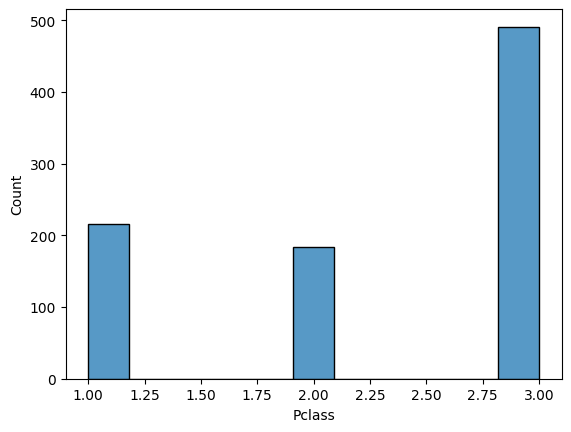

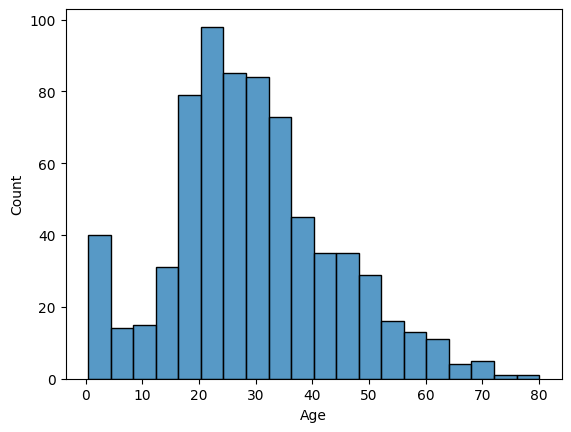

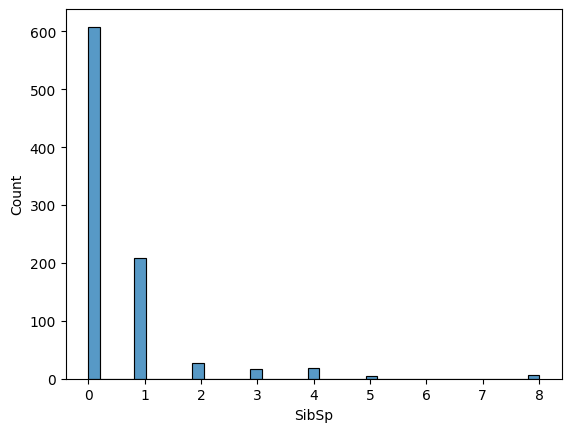

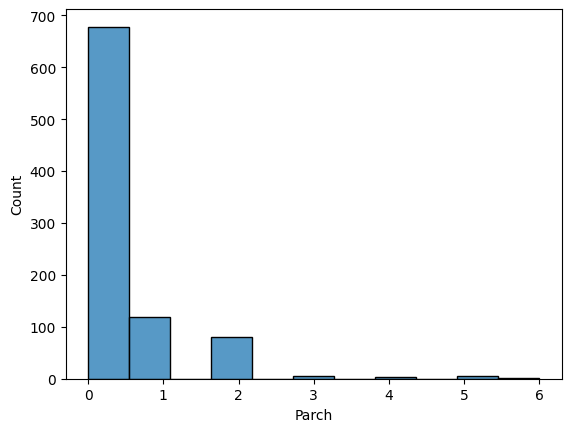

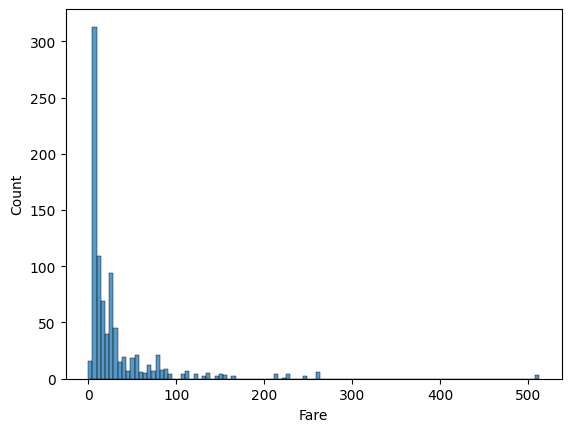

In [744]:
for column in data.columns[:-1]:
    if (data[column].dtype != "object"):
        sns.histplot(data=data, x=column)
        plt.show()

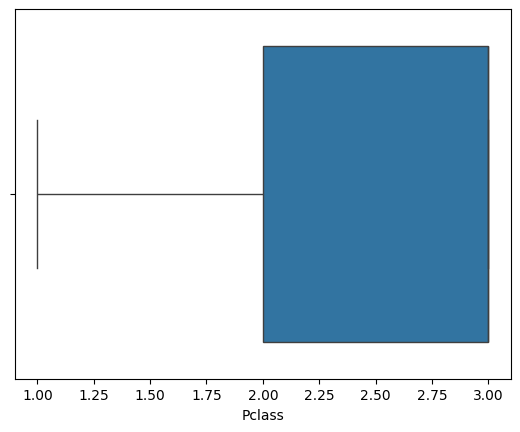

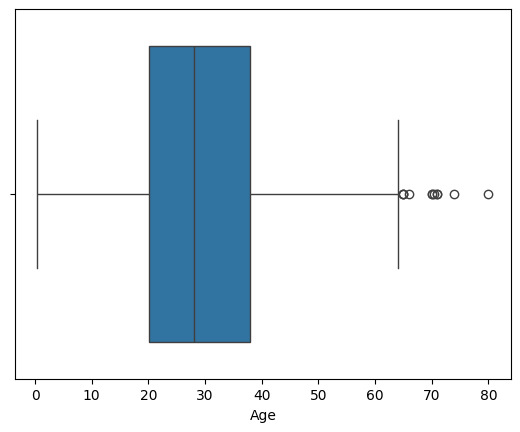

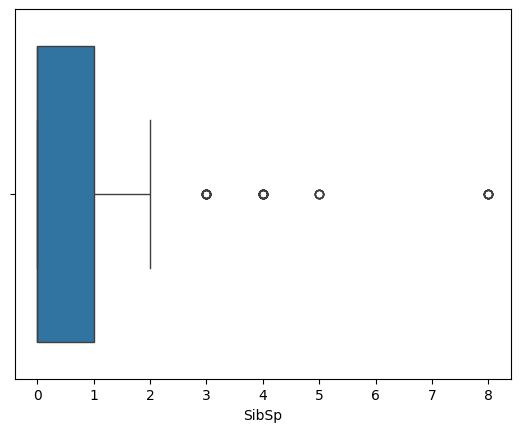

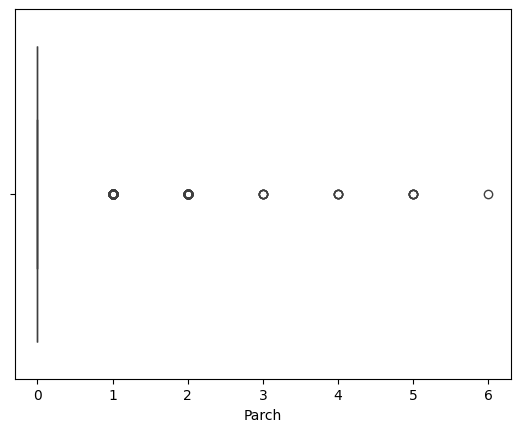

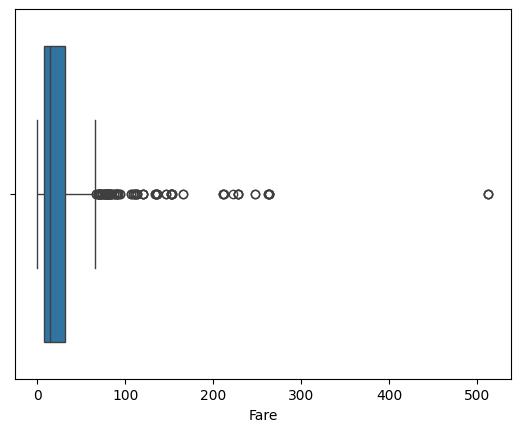

In [745]:
for column in data.columns[:-1]:
    if (data[column].dtype != "object"):
        sns.boxplot(data=data, x=column)
        plt.show()

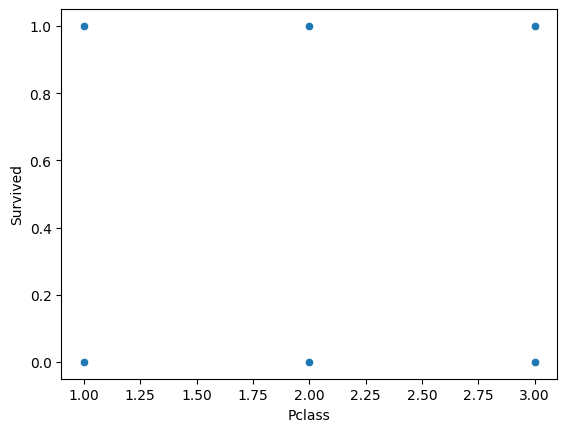

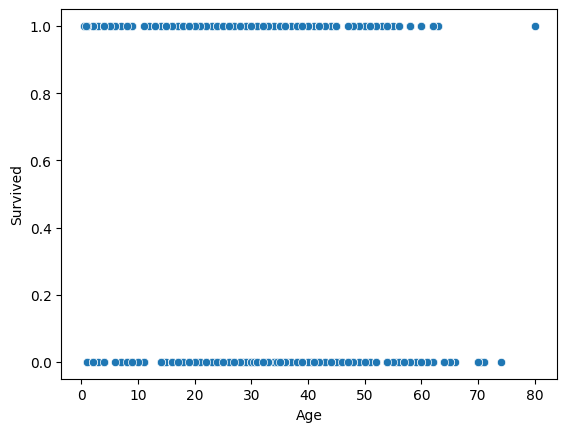

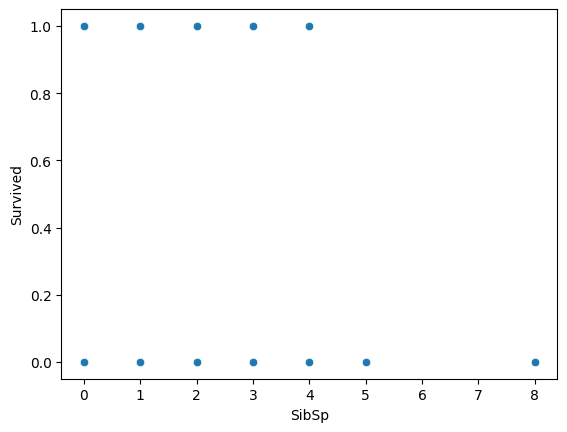

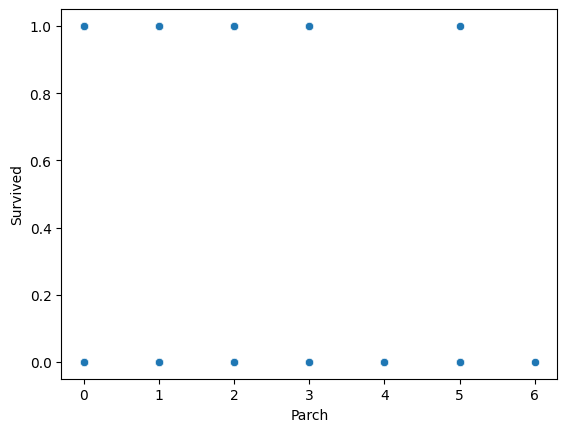

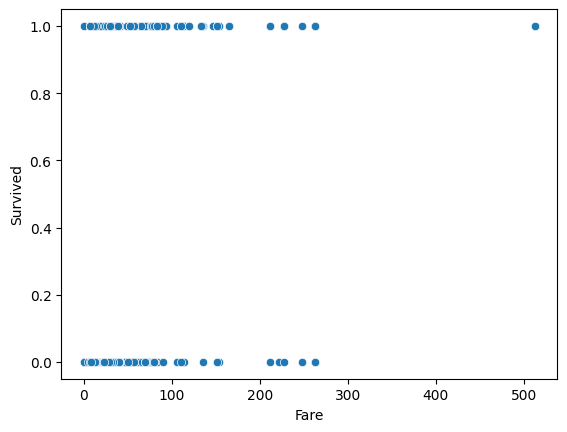

In [746]:
for column in data.columns[:-1]:
    if (data[column].dtype != "object"):
        sns.scatterplot(data=data, x=column, y="Survived")
        plt.show()

In [747]:
for column in data.columns[:-1]:
    if (data[column].dtype != "object"):
        print (f"Column {column}, Skewness: {data[column].skew()}, Kurtosis: {data[column].kurt()}")

Column Pclass, Skewness: -0.6305479068752845, Kurtosis: -1.2800149715782825
Column Age, Skewness: 0.38910778230082704, Kurtosis: 0.17827415364210353
Column SibSp, Skewness: 3.6953517271630565, Kurtosis: 17.880419726645968
Column Parch, Skewness: 2.7491170471010933, Kurtosis: 9.778125179021648
Column Fare, Skewness: 4.787316519674893, Kurtosis: 33.39814088089868


# Data Preprocessing

In [748]:
data.isna().sum()

Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
Survived      0
dtype: int64

In [749]:
missing_value_percentage = data.isna().sum() / len(data)
missing_value_percentage

Pclass      0.000000
Sex         0.000000
Age         0.198653
SibSp       0.000000
Parch       0.000000
Fare        0.000000
Cabin       0.771044
Embarked    0.002245
Survived    0.000000
dtype: float64

In [750]:
for key, value in missing_value_percentage.items():
    if (value > 0.5):
        data = data.drop(columns=key)

In [751]:
data

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,male,22.0,1,0,7.2500,S,0
1,1,female,38.0,1,0,71.2833,C,1
2,3,female,26.0,0,0,7.9250,S,1
3,1,female,35.0,1,0,53.1000,S,1
4,3,male,35.0,0,0,8.0500,S,0
...,...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000,S,0
887,1,female,19.0,0,0,30.0000,S,1
888,3,female,NaN,1,2,23.4500,S,0
889,1,male,26.0,0,0,30.0000,C,1


In [752]:
for column in data.columns[:-1]:
    if (data[column].isna().any()):
        if (data[column].dtypes == "object"):
            data[column] = data[column].fillna(data[column].mode()[0])
        else:
            data[column] = data[column].fillna(data[column].median())

In [753]:
data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,male,22.0,1,0,7.2500,S,0
1,1,female,38.0,1,0,71.2833,C,1
2,3,female,26.0,0,0,7.9250,S,1
3,1,female,35.0,1,0,53.1000,S,1
4,3,male,35.0,0,0,8.0500,S,0


In [754]:
data.isna().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Survived    0
dtype: int64

In [755]:
data.dtypes

Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
Survived      int64
dtype: object

In [756]:
encoder = LabelEncoder()
encoded = {}

for column in data.columns[:-1]:
    if (data[column].dtype == "object"):
        data[column] = encoder.fit_transform(data[column])
        encoded[column] = {i:class_name for i, class_name in enumerate(encoder.classes_)}

In [757]:
encoded

{'Sex': {0: 'female', 1: 'male'}, 'Embarked': {0: 'C', 1: 'Q', 2: 'S'}}

In [758]:
for key, value in encoded.items():
    print (f"Key: {key}, Value: {value}")

Key: Sex, Value: {0: 'female', 1: 'male'}
Key: Embarked, Value: {0: 'C', 1: 'Q', 2: 'S'}


# Modelling

### Pisahkan data independent dan data dependent

In [759]:
x = data[data.columns[:-1]]
y = data[data.columns[-1]]

In [760]:
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,2
1,1,0,38.0,1,0,71.2833,0
2,3,0,26.0,0,0,7.9250,2
3,1,0,35.0,1,0,53.1000,2
4,3,1,35.0,0,0,8.0500,2


In [761]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

### Splitting Data

In [762]:
x_test, x_train, y_test, y_train = train_test_split(x, y, test_size=0.2)

### Buat Model

In [763]:
model = LinearRegression()
model.fit(X=x_train, y=y_train)

LinearRegression()

In [764]:
y_pred = model.predict(x_test)
y_pred

array([ 1.10848720e+00,  1.51648820e-01,  1.64212585e-01,  1.91848043e-01,
       -2.52556887e-02,  3.01325427e-01,  1.22188356e-01,  3.26694969e-01,
        4.12882241e-02,  5.31058366e-01,  4.93770181e-01,  3.52919990e-01,
        1.33604048e-01,  7.12269484e-01,  5.54283447e-01,  3.72563646e-01,
        7.29404540e-01,  2.49940727e-01,  3.04719538e-01,  8.13658396e-01,
        1.24817508e-01,  2.73701813e-01,  1.22050613e-01,  7.46929790e-01,
        1.74755690e-01,  1.10412118e+00,  1.10608837e-01,  4.64193578e-01,
        6.44211785e-02,  2.83826560e-02,  2.27814350e-02,  3.49772350e-01,
        1.66850230e-01,  9.02653917e-02,  8.43222822e-01,  8.08132157e-01,
        1.33604048e-01,  6.72218837e-02,  5.03077417e-01,  1.33741791e-01,
        8.86755166e-01,  2.50321036e-01,  1.58125044e-01,  9.85713421e-01,
        1.39607836e-01,  1.94838189e-02,  5.30873094e-02,  1.04700747e+00,
        5.46243996e-01,  2.40351862e-01,  5.31766366e-02,  3.59151709e-01,
        1.79929449e-01,  

In [765]:
koefisien = model.coef_
intercept = model.intercept_

print (f"Linear Regression Model: {intercept} + {koefisien}x")

Linear Regression Model: 1.5798482524438726 + [-0.21835682 -0.5345601  -0.00577672 -0.06091446 -0.09172116 -0.00089327
 -0.04383736]x


# Evaluation

In [766]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)

print (f"MSE: {mse}")
print (f"RMSE: {rmse}")
print (f"R2 Score: {r2}")

MSE: 0.1558598091381968
RMSE: 0.39479084226739203
R2 Score: 0.3359873345791814


In [767]:
y_train_pred = model.predict(x_train)

In [768]:
train_mse = mean_squared_error(y_train_pred, y_train)
print (f"MSE: {train_mse}")

MSE: 0.13744282307602662


In [769]:
# Evaluasi apakah model mengalami overfitting
if train_mse < mse:
    print("\nModel mengalami overfitting, karena kesalahan pada data training lebih rendah dibandingkan pada data testing.")
else:
    print("\nModel tidak mengalami overfitting.")


Model mengalami overfitting, karena kesalahan pada data training lebih rendah dibandingkan pada data testing.


# Regularization

Intinya digunakan untuk mengurangi overfitting

In [770]:
from sklearn.linear_model import Lasso, Ridge

In [771]:
rigde_model = Ridge(alpha=0.2)
lasso_model = Lasso(alpha=0.2)

In [772]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [773]:
rigde_model.fit(X=x_train, y=y_train)
lasso_model.fit(X=x_train, y=y_train)

Lasso(alpha=0.2)

In [774]:
ridgePred = rigde_model.predict(x_test)
lassoPred = lasso_model.predict(x_test)

In [775]:
# Ridge

mse = mean_squared_error(y_test, ridgePred)
print (f"MSE: {mse}")

r2 = r2_score(ridgePred, y_test)
print (f"R2 Score: {r2}")

a = root_mean_squared_error(ridgePred, y_test)
print (f"RMSE: {a}")

MSE: 0.14073901037352887
R2 Score: -0.31143482858237737
RMSE: 0.3751519830329154


In [776]:
# Evaluasi apakah model mengalami overfitting
if train_mse < mse:
    print("\nModel mengalami overfitting, karena kesalahan pada data training lebih rendah dibandingkan pada data testing.")
else:
    print("\nModel tidak mengalami overfitting.")


Model mengalami overfitting, karena kesalahan pada data training lebih rendah dibandingkan pada data testing.


In [777]:
# Lasso

mse = mean_squared_error(y_test, lassoPred)
print (f"MSE: {mse}")

r2 = r2_score(lassoPred, y_test)
print (f"R2 Score: {r2}")

a = root_mean_squared_error(lassoPred, y_test)
print (f"RMSE: {a}")

MSE: 0.22911445368651973
R2 Score: -10.77124296962645
RMSE: 0.47865901609237416


In [778]:
# Evaluasi apakah model mengalami overfitting
if train_mse < mse:
    print("\nModel mengalami overfitting, karena kesalahan pada data training lebih rendah dibandingkan pada data testing.")
else:
    print("\nModel tidak mengalami overfitting.")


Model mengalami overfitting, karena kesalahan pada data training lebih rendah dibandingkan pada data testing.


Terlihat hasilnya justru sekarang sepertinya malah jadi underfitting, karena MSE dari test tanpa regularization lebih kecil dibandingkan menggunakan regularization

# Classification

## Logistic Regression

In [779]:
model2 = LogisticRegression()
model2.fit(X=x_train, y=y_train)

LogisticRegression()

In [780]:
y_pred2 = model2.predict(x_test)
y_pred2

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 0], dtype=int64)

In [781]:
mse = mean_squared_error(y_test, y_pred2)
r2 = r2_score(y_test, y_pred2)
rmse = root_mean_squared_error(y_test, y_pred2)

precission = precision_score(y_test, y_pred2)
recall = recall_score(y_test, y_pred2)
accuracy = accuracy_score(y_test, y_pred2)
roc = roc_auc_score(y_test, y_pred2)

confusion = confusion_matrix(y_test, y_pred2)
classification = classification_report(y_test, y_pred2)


print (f"MSE: {mse}")
print (f"RMSE: {rmse}")
print (f"R2 Score: {r2}")

print (f"Precission: {precission}")
print (f"Recall: {recall}")
print (f"Accuracy Score: {accuracy}")
print (f"ROC Score: {roc}")

print(f"Confusion Matrix: {confusion}")
print(f"Classification Report: {classification}")

MSE: 0.18435754189944134
RMSE: 0.42936877145344576
R2 Score: 0.24540112416964743
Precission: 0.8412698412698413
Recall: 0.6973684210526315
Accuracy Score: 0.8156424581005587
ROC Score: 0.8001405212059274
Confusion Matrix: [[93 10]
 [23 53]]
Classification Report:               precision    recall  f1-score   support

           0       0.80      0.90      0.85       103
           1       0.84      0.70      0.76        76

    accuracy                           0.82       179
   macro avg       0.82      0.80      0.81       179
weighted avg       0.82      0.82      0.81       179



## Naive Bayes

In [782]:
model3 = GaussianNB()
model3.fit(X=x_train, y=y_train)

GaussianNB()

In [783]:
y_pred3 = model3.predict(x_test)
y_pred3

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 0], dtype=int64)

In [784]:
mse = mean_squared_error(y_test, y_pred3)
r2 = r2_score(y_test, y_pred3)
rmse = root_mean_squared_error(y_test, y_pred3)

precission = precision_score(y_test, y_pred3)
recall = recall_score(y_test, y_pred3)
accuracy = accuracy_score(y_test, y_pred3)
roc = roc_auc_score(y_test, y_pred3)

confusion = confusion_matrix(y_test, y_pred3)
classification = classification_report(y_test, y_pred3)


print (f"MSE: {mse}")
print (f"RMSE: {rmse}")
print (f"R2 Score: {r2}")

print (f"Precission: {precission}")
print (f"Recall: {recall}")
print (f"Accuracy Score: {accuracy}")
print (f"ROC Score: {roc}")

print(f"Confusion Matrix: {confusion}")
print(f"Classification Report: {classification}")

MSE: 0.2011173184357542
RMSE: 0.4484610556511615
R2 Score: 0.176801226366888
Precission: 0.803030303030303
Recall: 0.6973684210526315
Accuracy Score: 0.7988826815642458
ROC Score: 0.7855774144098109
Confusion Matrix: [[90 13]
 [23 53]]
Classification Report:               precision    recall  f1-score   support

           0       0.80      0.87      0.83       103
           1       0.80      0.70      0.75        76

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



Karena nilai-nilai evaluasi matrix dari Logistic Regression > Naive Bayes, maka kesimpulannya:
1. Dataset tersebut mengandung berbagai data yang saling berkaitan atau memiliki korelasi satu dengan yang lainnya (karena, Naive Bayes akan tinggi nilainya jika dataset independent, akibat asumsi teori Naive tersebut. Akan tetapi, karena Logistic Regression nilai evaluasinya lebih tinggi, kita bisa mengambil kesimpulan bahwa dataset tersebut memiliki data-data yang cukup saling berkorelasi satu dengan yang lainnya)

2. Data tidak berdistribusi normal (karena nilai evaluasi dari Logistic Regression lebih tinggi)

3. Pemisahan kelas / fitur bersifat linear

4. Data memiliki noise yang bisa dikatakan rendah (karena jika noise tinggi, maka seharusnya akurasi Naive Bayes bisa lebih tinggi dibandingkan dengan Logistic Regression).

5. Dataset memiliki ukuran/jumlah baris yang cukup untuk melakukan prediksi

# Additional

## Correlation Feature - Preprocessing

In [785]:
def correlation(data_df, threshold) :
  corr_col = set()
  corr_matrix = data_df.corr()
  print(corr_matrix)
  for i in range(len(corr_matrix.columns)) :
    for j in range(i + 1, len(corr_matrix.columns)) :
      if(np.abs(corr_matrix.iloc[(i, j)]) > threshold) :
        corr_col.add(corr_matrix.columns[j])
  return corr_col

In [786]:
corr_col = correlation(x_train, threshold = 0.9)
print(corr_col)
print(len(corr_col))

            Pclass       Sex       Age     SibSp     Parch      Fare  Embarked
Pclass    1.000000  0.097380 -0.345384  0.085484  0.023910 -0.560435  0.151022
Sex       0.097380  1.000000  0.083080 -0.100264 -0.239832 -0.152283  0.076411
Age      -0.345384  0.083080  1.000000 -0.249943 -0.159928  0.104065 -0.018860
SibSp     0.085484 -0.100264 -0.249943  1.000000  0.394295  0.160460  0.059267
Parch     0.023910 -0.239832 -0.159928  0.394295  1.000000  0.226578  0.037639
Fare     -0.560435 -0.152283  0.104065  0.160460  0.226578  1.000000 -0.216877
Embarked  0.151022  0.076411 -0.018860  0.059267  0.037639 -0.216877  1.000000
set()
0


In [787]:
x_train = x_train.drop(columns = corr_col, axis = 1)
x_test = x_test.drop(columns = corr_col, axis = 1)

In [788]:
x_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
888,3,0,28.0,1,2,23.4500,2
123,2,0,32.5,0,0,13.0000,2
225,3,1,22.0,0,0,9.3500,2
867,1,1,31.0,0,0,50.4958,2
810,3,1,26.0,0,0,7.8875,2
...,...,...,...,...,...,...,...
666,2,1,25.0,0,0,13.0000,2
0,3,1,22.0,1,0,7.2500,2
504,1,0,16.0,0,0,86.5000,2
121,3,1,28.0,0,0,8.0500,2


## Scaling

In [789]:
scaler_x_minmax = MinMaxScaler()
scaler_x_standard = StandardScaler()

In [790]:
def scaling(x1, x2, scaler_x) :
  x1 = scaler_x.fit_transform(x1)
  x2 = scaler_x.transform(x2)
  return x1, x2, scaler_x

In [791]:
x_train1, x_test1, scaler_x_minmax = scaling(x_train, x_test, scaler_x_minmax)

In [792]:
x_train2, x_test2, scaler_x_standard = scaling(x_train, x_test, scaler_x_standard)

In [793]:
model = LogisticRegression() #LogisticRegression with MinMaxScaler()
history = model.fit(x_train1, y_train)
y_pred = model.predict(x_test1)
y_pred_prob = model.predict_proba(x_test1)[:, 1]
print(f"accuracy_score : {accuracy_score(y_test, y_pred)}, recall_score : {recall_score(y_test, y_pred)}, precision_score : {precision_score(y_test, y_pred)}, roc_auc_score : {roc_auc_score(y_test, y_pred_prob)}")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

accuracy_score : 0.8268156424581006, recall_score : 0.7105263157894737, precision_score : 0.8571428571428571, roc_auc_score : 0.8631834440470108
[[94  9]
 [22 54]]
              precision    recall  f1-score   support

           0       0.81      0.91      0.86       103
           1       0.86      0.71      0.78        76

    accuracy                           0.83       179
   macro avg       0.83      0.81      0.82       179
weighted avg       0.83      0.83      0.82       179



In [794]:
model = LogisticRegression() #LogisticRegression with StandardScaler()
history = model.fit(x_train2, y_train)
y_pred = model.predict(x_test2)
y_pred_prob = model.predict_proba(x_test2)[:, 1]
print(f"accuracy_score : {accuracy_score(y_test, y_pred)}, recall_score : {recall_score(y_test, y_pred)}, precision_score : {precision_score(y_test, y_pred)}, roc_auc_score : {roc_auc_score(y_test, y_pred_prob)}")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

accuracy_score : 0.8156424581005587, recall_score : 0.6973684210526315, precision_score : 0.8412698412698413, roc_auc_score : 0.8673990802248339
[[93 10]
 [23 53]]
              precision    recall  f1-score   support

           0       0.80      0.90      0.85       103
           1       0.84      0.70      0.76        76

    accuracy                           0.82       179
   macro avg       0.82      0.80      0.81       179
weighted avg       0.82      0.82      0.81       179



In [795]:
model = GaussianNB() #GaussianNB with MinMaxScaler()
history = model.fit(x_train1, y_train)
y_pred = model.predict(x_test1)
y_pred_prob = model.predict_proba(x_test1)[:, 1]
print(f"accuracy_score : {accuracy_score(y_test, y_pred)}, recall_score : {recall_score(y_test, y_pred)}, precision_score : {precision_score(y_test, y_pred)}, roc_auc_score : {roc_auc_score(y_test, y_pred_prob)}")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

accuracy_score : 0.7988826815642458, recall_score : 0.6973684210526315, precision_score : 0.803030303030303, roc_auc_score : 0.8192386305569749
[[90 13]
 [23 53]]
              precision    recall  f1-score   support

           0       0.80      0.87      0.83       103
           1       0.80      0.70      0.75        76

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



In [796]:
model = GaussianNB() #GaussianNB with StandardScaler()
history = model.fit(x_train2, y_train)
y_pred = model.predict(x_test2)
y_pred_prob = model.predict_proba(x_test2)[:, 1]
print(f"accuracy_score : {accuracy_score(y_test, y_pred)}, recall_score : {recall_score(y_test, y_pred)}, precision_score : {precision_score(y_test, y_pred)}, roc_auc_score : {roc_auc_score(y_test, y_pred_prob)}")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

accuracy_score : 0.7988826815642458, recall_score : 0.6973684210526315, precision_score : 0.803030303030303, roc_auc_score : 0.8192386305569749
[[90 13]
 [23 53]]
              precision    recall  f1-score   support

           0       0.80      0.87      0.83       103
           1       0.80      0.70      0.75        76

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



Scaling adalah proses yang digunakan untuk mengubah rentang data atau skala fitur (variabel independen) agar berada dalam rentang yang seragam.

Sekarang justru evaluasi menggunakan Naive Bayes lebih tinggi :)

# Predicted Values vs Actual Values Comparison

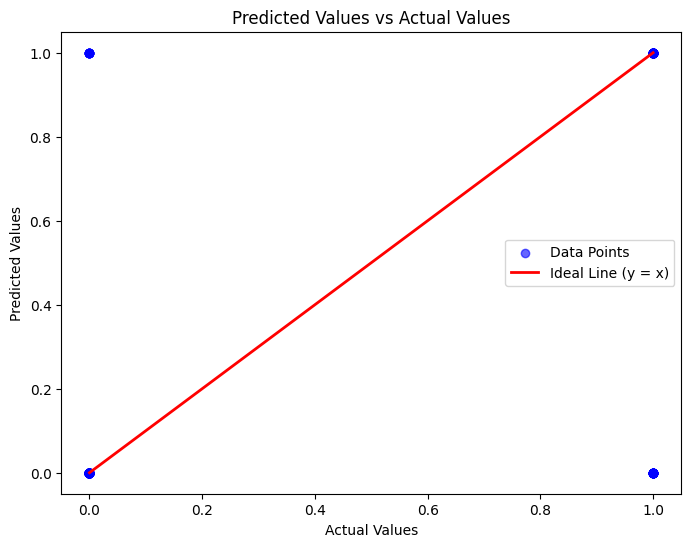

In [797]:
# 1. Membandingkan Predicted Values dan Actual Values
plt.figure(figsize=(8, 6))

# Scatter plot antara Predicted dan Actual
plt.scatter(y_test, y_pred2, color='blue', label='Data Points', alpha=0.6)
plt.plot([0, 1], [0, 1], color='red', lw=2, label="Ideal Line (y = x)")  # Garis ideal
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted Values vs Actual Values')
plt.legend()
plt.show()

In [798]:
errors = np.sum(y_test != y_pred2)
print(f'Jumlah kesalahan prediksi: {errors} dari {len(y_test)} sampel')

Jumlah kesalahan prediksi: 33 dari 179 sampel


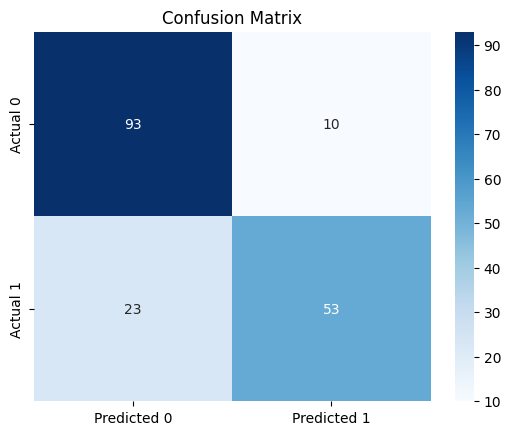

In [799]:
conf_matrix = confusion_matrix(y_test, y_pred2)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.show()

Berarti 93 + 53 / (78 + 26 + 34 + 41) => Accuracy
<br>
Predicted Values bener 146 dari 179

## Scaling Linear Regression

In [800]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [801]:
x_train = x_train.to_numpy()
x_test = x_test.to_numpy()

In [802]:
y_train = np.reshape(y_train, (-1, 1))
y_test = np.reshape(y_test, (-1, 1))

In [803]:
minScalingX, minScalingY = MinMaxScaler(), MinMaxScaler()
standardScalingX, standardScalingY = StandardScaler(), StandardScaler()

In [804]:
def scaling (x1, x2, y1, y2, scaler_x, scaler_y):
    x1 = scaler_x.fit_transform(x1)
    x2 = scaler_x.transform(x2)
    y1 = scaler_y.fit_transform(y1)
    y2 = scaler_y.transform(y2)
    return x1, x2, y1, y2, scaler_x, scaler_y

In [805]:
x_train3, x_test3, y_train3, y_test3, scaler_x_minmax, scaler_y_minmax = scaling (x_train, x_test, y_train, y_test, minScalingX, minScalingY)

In [806]:
x_train4, x_test4, y_train4, y_test4, scaler_x_standard, scaler_y_standard = scaling (x_train, x_test, y_train, y_test, standardScalingX, standardScalingY)

In [807]:
model = LinearRegression() #LinearRegression dengan MinMaxScaler()
history = model.fit(x_train3, y_train3)
y_pred = model.predict(x_test3)
print(f"RMSE : {root_mean_squared_error(y_test3, y_pred)}, MSE : {mean_squared_error(y_test3, y_pred)}, R2_SCORE : {r2_score(y_test3, y_pred)}")

RMSE : 0.3483041020766111, MSE : 0.12131574752339432, R2_SCORE : 0.4976637546656657


In [808]:
model = LinearRegression() #LinearRegression dengan StandardScaler
history = model.fit(x_train4, y_train4)
y_pred = model.predict(x_test4)
print(f"RMSE : {root_mean_squared_error(y_test4, y_pred)}, MSE : {mean_squared_error(y_test4, y_pred)}, R2_SCORE : {r2_score(y_test4, y_pred)}")

RMSE : 0.7183904987390728, MSE : 0.5160849086785737, R2_SCORE : 0.4976637546656659
